# INSTALLATION OF PACKAGES

In [24]:
install.packages('fpp3', dependencies = TRUE)
library(fpp3)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [25]:
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 1. Transformation and adjustments

## Population adjustment

In [11]:
global_economy[1:5,]

Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,537777811,NA,NA,7.024793,4.132233,8996351
Afghanistan,AFG,1961,548888896,NA,NA,8.097166,4.453443,9166764
Afghanistan,AFG,1962,546666678,NA,NA,9.349593,4.878051,9345868
Afghanistan,AFG,1963,751111191,NA,NA,16.863910,9.171601,9533954
Afghanistan,AFG,1964,800000044,NA,NA,18.055555,8.888893,9731361


In [96]:
write.csv(global_economy,"/Users/peterpaz/Dropbox/0_Forecasting/2_FPP/data/global_economy.csv", row.names = FALSE)


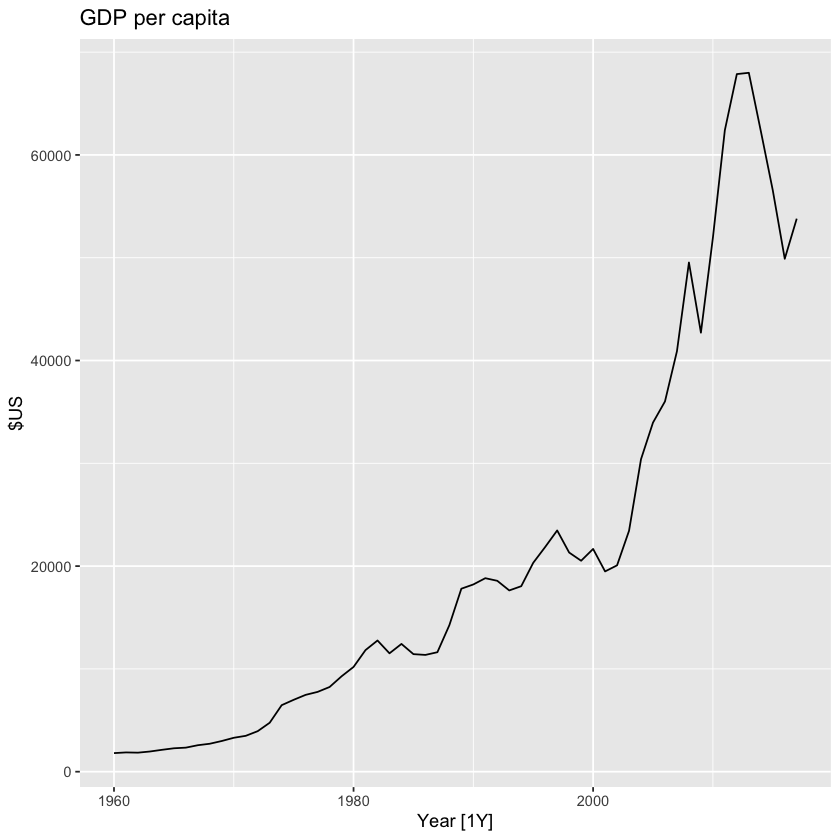

In [7]:
global_economy %>%
  filter(Country == "Australia") %>%
  autoplot(GDP/Population) +
  labs(title= "GDP per capita", y = "$US")

## Inflation adjustment

In [4]:
aus_retail[1:5,]

State,Industry,Series ID,Month,Turnover
<chr>,<chr>,<chr>,<mth>,<dbl>
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Apr,4.4
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 May,3.4
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jun,3.6
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jul,4.0
Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Aug,3.6


In [5]:
write.csv(aus_retail,"/Users/peterpaz/Dropbox/0_Forecasting/2_FPP/data/aus_retail.csv", row.names = FALSE)


In [16]:
print_retail<- aus_retail %>%
 filter(Industry=="Newspaper and book retailing") %>%
 group_by(Industry) %>%
 index_by(Year=year(Month)) %>%
 summarise(Turnover=sum(Turnover))

In [17]:
print_retail[1:5,]

Industry,Year,Turnover
<chr>,<dbl>,<dbl>
Newspaper and book retailing,1982,1263.0
Newspaper and book retailing,1983,1799.5
Newspaper and book retailing,1984,2011.3
Newspaper and book retailing,1985,2108.7
Newspaper and book retailing,1986,2263.3


In [18]:
aus_economy<- global_economy %>%
 filter(Code=="AUS")

In [19]:
aus_economy[1:5,]

Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,AUS,1960,18573188487,NA,7.960458,14.06175,12.99445,10276477
Australia,AUS,1961,19648336880,2.485605,8.142560,15.02508,12.40310,10483000
Australia,AUS,1962,19888005376,1.296478,8.116545,12.63093,13.94301,10742000
Australia,AUS,1963,21501847911,6.214278,8.168574,13.83405,13.00589,10950000
Australia,AUS,1964,23758539590,6.978724,8.402706,13.76450,14.93825,11167000


In [20]:
practice <- print_retail %>%
  left_join(aus_economy, by = "Year") 

In [21]:
practice[1:5,]

Industry,Year,Turnover,Country,Code,GDP,Growth,CPI,Imports,Exports,Population
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Newspaper and book retailing,1982,1263.0,Australia,AUS,193721725698,3.328119,33.42872,16.83374,13.54104,15178000
Newspaper and book retailing,1983,1799.5,Australia,AUS,176986429574,-2.220144,36.78460,15.62741,13.59473,15369000
Newspaper and book retailing,1984,2011.3,Australia,AUS,193194167723,4.581140,38.24142,15.00902,13.58022,15544000
Newspaper and book retailing,1985,2108.7,Australia,AUS,180190994861,5.249206,40.81686,17.30967,15.25999,15758000
Newspaper and book retailing,1986,2263.3,Australia,AUS,181977476217,4.055135,44.51093,18.08614,15.01374,16018400


In [22]:
practice2 <-print_retail %>%
 left_join(aus_economy, by = "Year") %>%
 mutate(Adjusted_turnover = Turnover /CPI *100 ) 

In [23]:
practice2[1:5,]

Industry,Year,Turnover,Country,Code,GDP,Growth,CPI,Imports,Exports,Population,Adjusted_turnover
<chr>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Newspaper and book retailing,1982,1263.0,Australia,AUS,193721725698,3.328119,33.42872,16.83374,13.54104,15178000,3778.188
Newspaper and book retailing,1983,1799.5,Australia,AUS,176986429574,-2.220144,36.78460,15.62741,13.59473,15369000,4891.993
Newspaper and book retailing,1984,2011.3,Australia,AUS,193194167723,4.581140,38.24142,15.00902,13.58022,15544000,5259.481
Newspaper and book retailing,1985,2108.7,Australia,AUS,180190994861,5.249206,40.81686,17.30967,15.25999,15758000,5166.248
Newspaper and book retailing,1986,2263.3,Australia,AUS,181977476217,4.055135,44.51093,18.08614,15.01374,16018400,5084.819


In [43]:
practice7 <-print_retail %>%
  left_join(aus_economy, by = "Year") %>%
  mutate(Adjusted_turnover = Turnover / CPI * 100) %>%
  pivot_longer(c(Turnover, Adjusted_turnover),
               values_to = "Turnover")

In [44]:
practice7[1:5,]

Industry,Year,Country,Code,GDP,Growth,CPI,Imports,Exports,Population,name,Turnover
<chr>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Newspaper and book retailing,1982,Australia,AUS,193721725698,3.328119,33.42872,16.83374,13.54104,15178000,Turnover,1263.000
Newspaper and book retailing,1982,Australia,AUS,193721725698,3.328119,33.42872,16.83374,13.54104,15178000,Adjusted_turnover,3778.188
Newspaper and book retailing,1983,Australia,AUS,176986429574,-2.220144,36.78460,15.62741,13.59473,15369000,Turnover,1799.500
Newspaper and book retailing,1983,Australia,AUS,176986429574,-2.220144,36.78460,15.62741,13.59473,15369000,Adjusted_turnover,4891.993
Newspaper and book retailing,1984,Australia,AUS,193194167723,4.581140,38.24142,15.00902,13.58022,15544000,Turnover,2011.300


In [41]:
practice6 <-print_retail %>%
  left_join(aus_economy, by = "Year") %>%
  mutate(Adjusted_turnover = Turnover / CPI * 100) %>%
  pivot_longer(c(Turnover, Adjusted_turnover),
               values_to = "Turnover") %>%
  mutate(name = factor(name,
         levels=c("Turnover","Adjusted_turnover")))

In [42]:
practice6[1:5,]

Industry,Year,Country,Code,GDP,Growth,CPI,Imports,Exports,Population,name,Turnover
<chr>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
Newspaper and book retailing,1982,Australia,AUS,193721725698,3.328119,33.42872,16.83374,13.54104,15178000,Turnover,1263.000
Newspaper and book retailing,1982,Australia,AUS,193721725698,3.328119,33.42872,16.83374,13.54104,15178000,Adjusted_turnover,3778.188
Newspaper and book retailing,1983,Australia,AUS,176986429574,-2.220144,36.78460,15.62741,13.59473,15369000,Turnover,1799.500
Newspaper and book retailing,1983,Australia,AUS,176986429574,-2.220144,36.78460,15.62741,13.59473,15369000,Adjusted_turnover,4891.993
Newspaper and book retailing,1984,Australia,AUS,193194167723,4.581140,38.24142,15.00902,13.58022,15544000,Turnover,2011.300


There is turnover variable that have both the adjusted and not adjusted,

in one column, then when i do the graph divide in two subplot according to 

different names(variable name) next to the turnover.

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


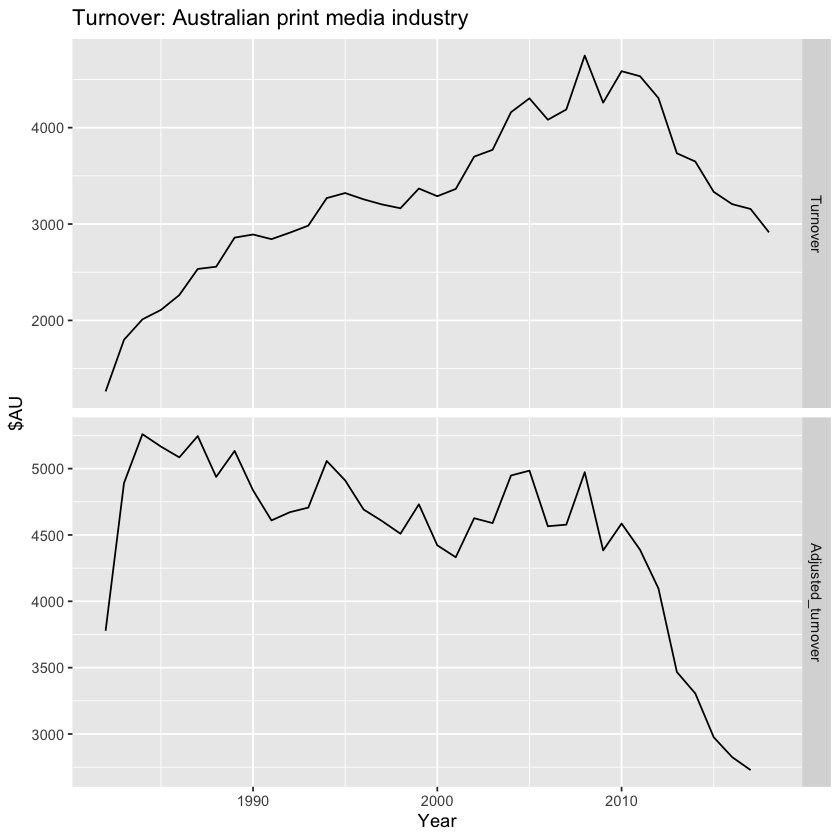

In [51]:
print_retail %>%
  left_join(aus_economy, by = "Year") %>%
  mutate(Adjusted_turnover = Turnover / CPI * 100) %>%
  pivot_longer(c(Turnover, Adjusted_turnover),
               values_to = "Turnover") %>%
  mutate(name = factor(name,
         levels=c("Turnover","Adjusted_turnover"))) %>%
ggplot(aes(x = Year, y = Turnover)) +
  geom_line() +
  facet_grid(name ~ ., scales = "free_y") +
  labs(title = "Turnover: Australian print media industry",
       y = "$AU")


## Box Cox transformation

In [54]:
aus_production[1:5,]

Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
<qtr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1956 Q1,284,5225,189,465,3923,5
1956 Q2,213,5178,204,532,4436,6
1956 Q3,227,5297,208,561,4806,7
1956 Q4,308,5681,197,570,4418,6
1957 Q1,262,5577,187,529,4339,5


In [7]:
write.csv(aus_production,"/Users/peterpaz/Dropbox/0_Forecasting/2_FPP/data/aus_production.csv", row.names = FALSE)


In [57]:
lambda <- aus_production %>%
 features(Gas, features= guerrero)

lambda[1:5,]

lambda_guerrero
<dbl>
0.1205077
NA
NA
NA
NA


In [60]:
lambda <- aus_production %>%
 features(Gas, features= guerrero) %>%
 pull(lambda_guerrero)

lambda

[1] 0.1205077

In [65]:
#install.packages('latex2exp')

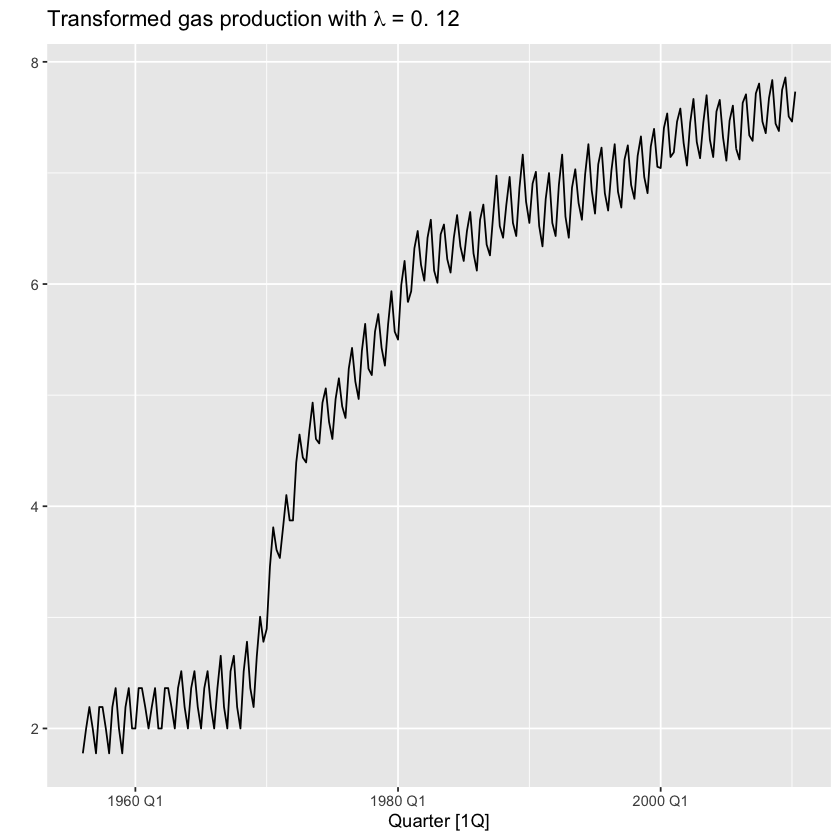

In [66]:
aus_production %>%
  autoplot(box_cox(Gas, lambda)) +
  labs(y = "",
       title = latex2exp::TeX(paste0(
         "Transformed gas production with $\\lambda$ = ",
         round(lambda,2))))

# 2. Time Series Components

Additive:       y= S+T+R

Multiplicative: y= SxTxR

- y:data
- S: seasonal component.
- T: trend component.
- R: remainder component.

In [28]:
us_employment[1:5,]

Month,Series_ID,Title,Employed
<mth>,<chr>,<chr>,<dbl>
1939 Jan,CEU0500000001,Total Private,25338
1939 Feb,CEU0500000001,Total Private,25447
1939 Mar,CEU0500000001,Total Private,25833
1939 Apr,CEU0500000001,Total Private,25801
1939 May,CEU0500000001,Total Private,26113


In [29]:
write.csv(us_employment,"/Users/peterpaz/Dropbox/0_Forecasting/2_FPP/data/us_employment.csv", row.names = FALSE)


In [30]:
#us_retail_employment <- us_employment %>%
# filter(year(Month) >=1990, Title == "Retail Trade" ) %>%
# select(Series_ID)

In [31]:
us_retail_employment[1:5,]

Series_ID,Month
<chr>,<mth>
CEU4200000001,1990 Jan
CEU4200000001,1990 Feb
CEU4200000001,1990 Mar
CEU4200000001,1990 Apr
CEU4200000001,1990 May


In [32]:
us_retail_employment2 <- us_employment %>%
 filter(year(Month) >=1990, Title == "Retail Trade" ) %>%
 select(-Series_ID)


select(-Series_ID) means that select all the variables except series_ID

In [33]:
us_retail_employment2[1:5,]

Month,Title,Employed
<mth>,<chr>,<dbl>
1990 Jan,Retail Trade,13255.8
1990 Feb,Retail Trade,12966.3
1990 Mar,Retail Trade,12938.2
1990 Apr,Retail Trade,13012.3
1990 May,Retail Trade,13108.3


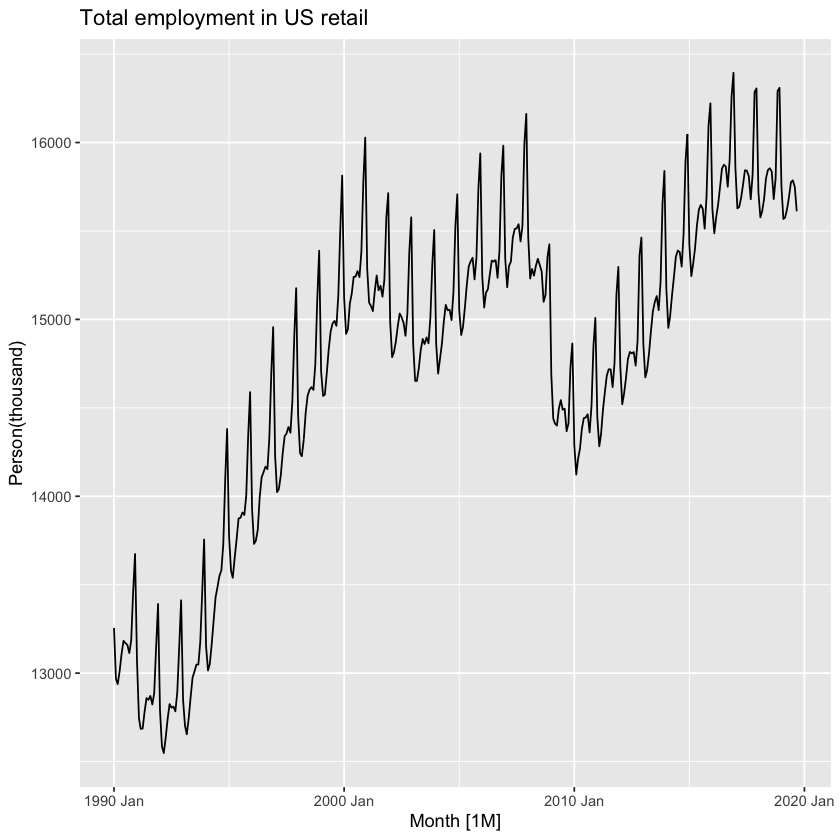

In [34]:
autoplot(us_retail_employment2, Employed)+
 labs(y="Person(thousand)", title= "Total employment in US retail")

### STL decomposition method:

Talk more details on part 6.

In [35]:
us_retail_employment2[1:5,]

Month,Title,Employed
<mth>,<chr>,<dbl>
1990 Jan,Retail Trade,13255.8
1990 Feb,Retail Trade,12966.3
1990 Mar,Retail Trade,12938.2
1990 Apr,Retail Trade,13012.3
1990 May,Retail Trade,13108.3


In [36]:
dcmp<-us_retail_employment2 %>%
 model(stl=STL(Employed))


In [81]:
dcmp[1:5,]

stl
<model>
<STL>
<NULL>
<NULL>
<NULL>
<NULL>


In [82]:
 components(dcmp)

.model,Month,Employed,trend,season_year,remainder,season_adjust
<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stl,1990 Jan,13255.8,13290.78,-38.06049,3.08253902,13293.86
stl,1990 Feb,12966.3,13271.52,-261.00027,-44.21909739,13227.30
stl,1990 Mar,12938.2,13252.26,-291.10998,-22.95079515,13229.31
stl,1990 Apr,13012.3,13233.00,-220.79137,0.08917965,13233.09
stl,1990 May,13108.3,13212.84,-114.51926,9.97524478,13222.82
stl,1990 Jun,13182.8,13192.69,-25.60005,15.71421123,13208.40
stl,1990 Jul,13170.1,13172.53,-24.39599,21.96831773,13194.50
stl,1990 Aug,13159.5,13151.84,-11.81050,19.47055445,13171.31
stl,1990 Sep,13113.4,13131.15,-43.41552,25.66330377,13156.82


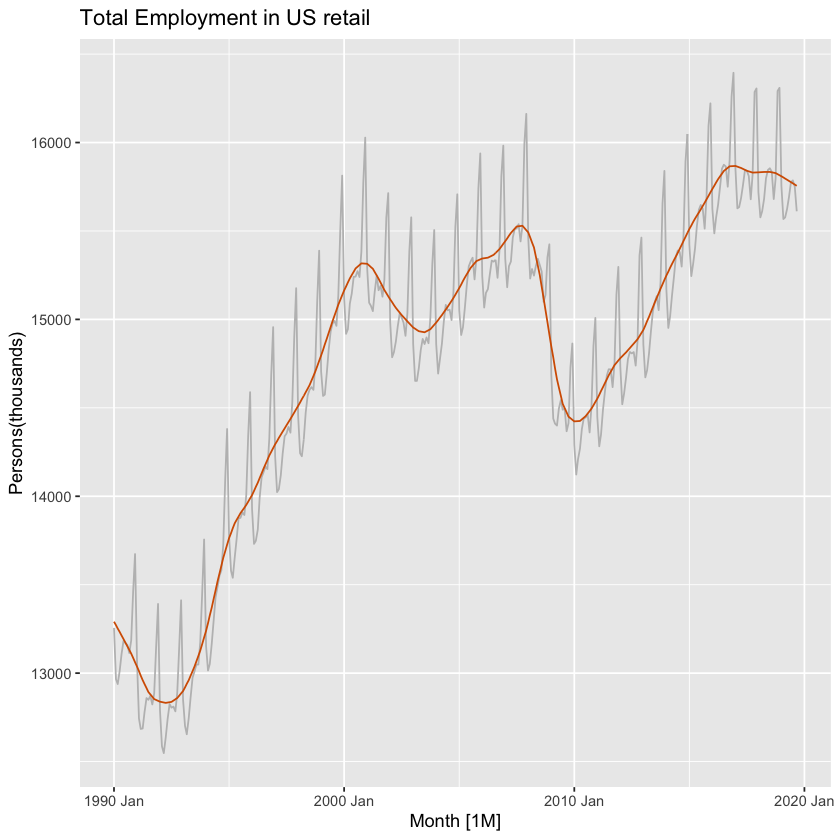

In [92]:
components(dcmp)%>%
 as_tsibble() %>%
 autoplot(Employed, colour="gray")         +
 geom_line(aes(y=trend), colour="#D55E00") +
 labs(
      y="Persons(thousands)",
      title= "Total Employment in US retail"
 )

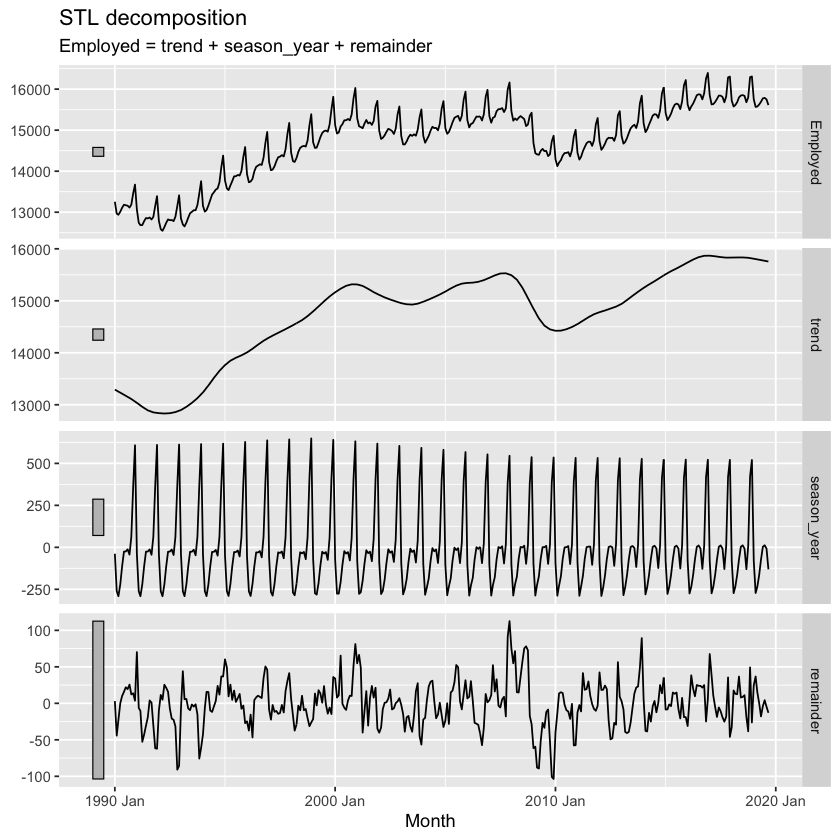

In [93]:
components(dcmp) %>% autoplot()

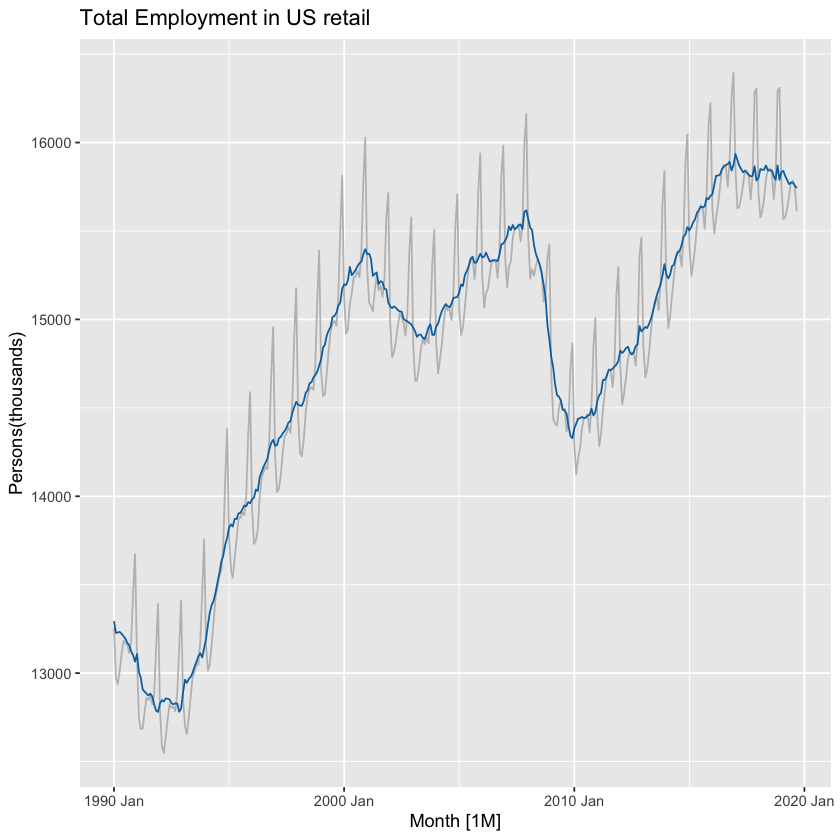

In [95]:
components(dcmp)%>%
 as_tsibble() %>%
 autoplot(Employed, colour="gray")         +
 geom_line(aes(y=season_adjust), colour="#0072B2") +
 labs(
      y="Persons(thousands)",
      title= "Total Employment in US retail"
 )

# 2 Time Series Components

In [9]:
global_economy[1:5,]

Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,1960,537777811,NA,NA,7.024793,4.132233,8996351
Afghanistan,AFG,1961,548888896,NA,NA,8.097166,4.453443,9166764
Afghanistan,AFG,1962,546666678,NA,NA,9.349593,4.878051,9345868
Afghanistan,AFG,1963,751111191,NA,NA,16.863910,9.171601,9533954
Afghanistan,AFG,1964,800000044,NA,NA,18.055555,8.888893,9731361


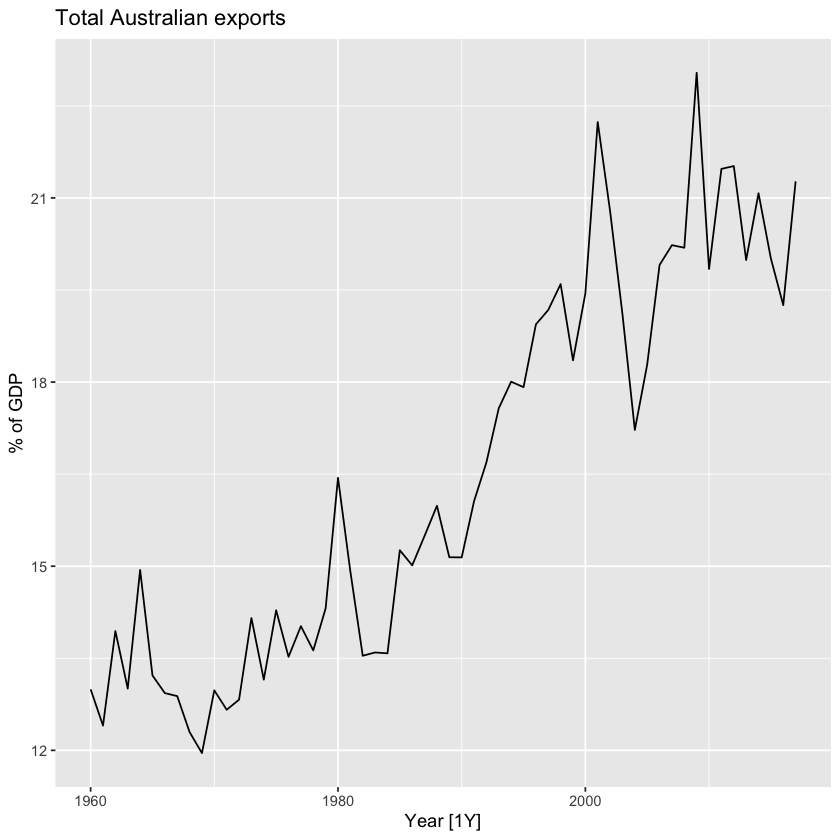

In [12]:
global_economy %>%
 filter(Country == "Australia") %>%
 autoplot(Exports ) +
 labs(y= "% of GDP", title="Total Australian exports")

# 3 Moving average smoothing


In [13]:
aus_exports<- global_economy %>%
 filter(Country == "Australia") %>%
 mutate(
   '5-MA'=slider::slide_dbl(Exports,mean,
                        .before=2,.after=2,.complete=TRUE)   
 )

In [16]:
aus_exports[1:7,]

Country,Code,Year,GDP,Growth,CPI,Imports,Exports,Population,5-MA
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Australia,AUS,1960,18573188487,NA,7.960458,14.06175,12.99445,10276477,NA
Australia,AUS,1961,19648336880,2.485605,8.142560,15.02508,12.40310,10483000,NA
Australia,AUS,1962,19888005376,1.296478,8.116545,12.63093,13.94301,10742000,13.45694
Australia,AUS,1963,21501847911,6.214278,8.168574,13.83405,13.00589,10950000,13.50208
Australia,AUS,1964,23758539590,6.978724,8.402706,13.76450,14.93825,11167000,13.60794
Australia,AUS,1965,25931235301,5.983450,8.688866,15.26734,13.22018,11388000,13.39608
Australia,AUS,1966,27261731437,2.382491,8.975026,15.13023,12.93238,11651000,13.25444


Warning message:
“Removed 4 row(s) containing missing values (geom_path).”


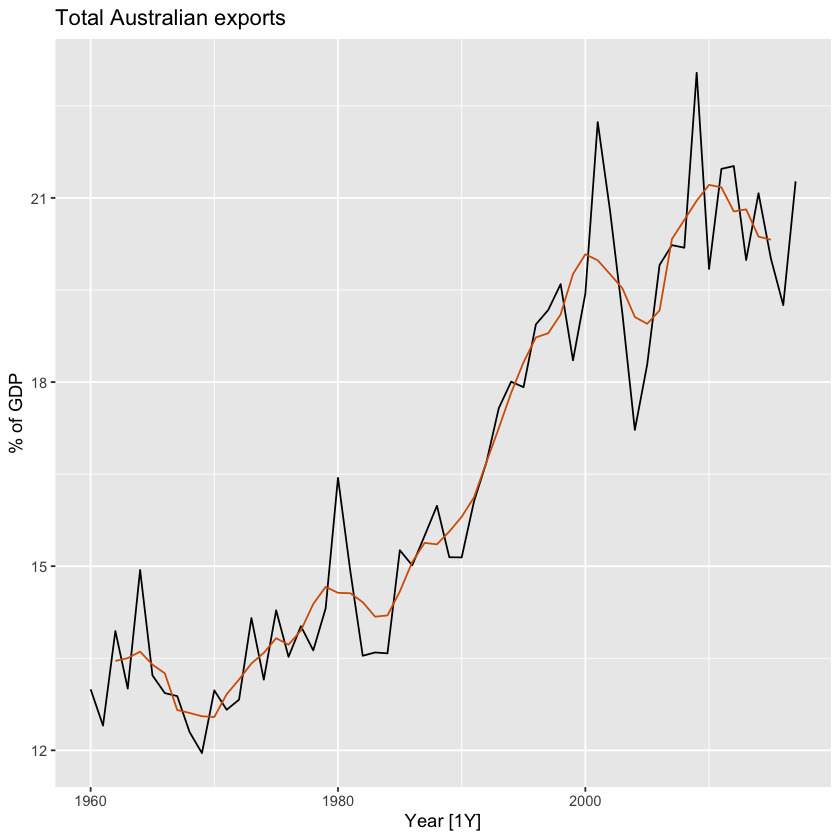

In [17]:
aus_exports %>%
  autoplot(Exports) +
  geom_line(aes(y = `5-MA`), colour = "#D55E00") +
  labs(y = "% of GDP",
       title = "Total Australian exports") +
  guides(colour = guide_legend(title = "series"))

New example:

In [45]:
us_retail_employment <- us_employment %>%
 filter(year(Month) >=1990, Title == "Retail Trade" ) %>%
 select(-Series_ID)

In [46]:
us_retail_employment_ma <- us_retail_employment %>%
  mutate(
    `12-MA` = slider::slide_dbl(Employed, mean,
                .before = 5, .after = 6, .complete = TRUE),
    `2x12-MA` = slider::slide_dbl(`12-MA`, mean,
                .before = 1, .after = 0, .complete = TRUE)
  )

Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


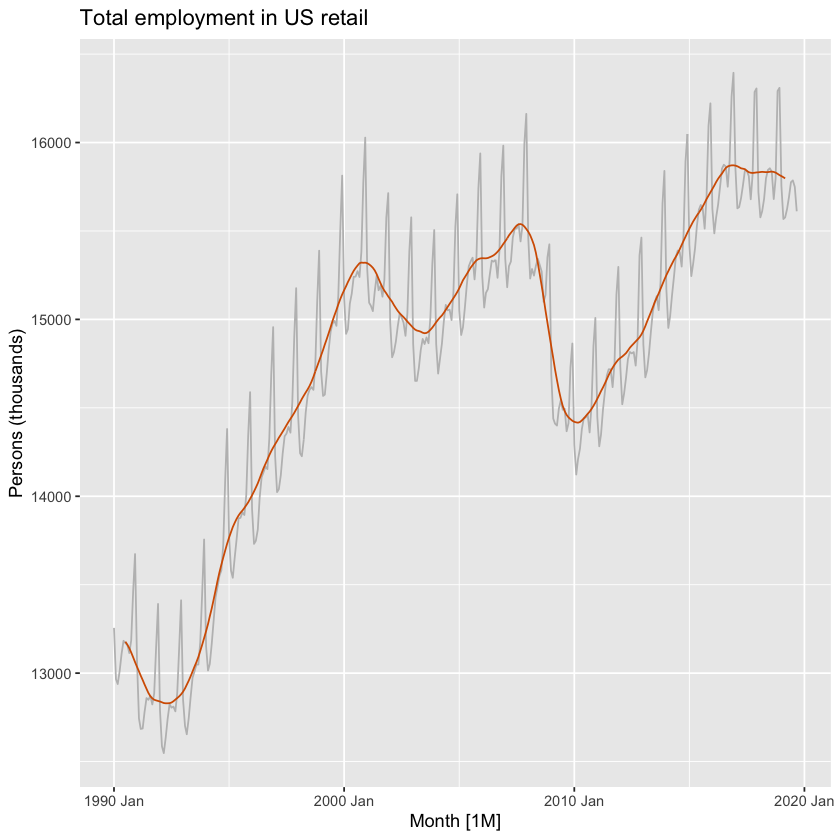

In [47]:
us_retail_employment_ma %>%
  autoplot(Employed, colour = "gray") +
  geom_line(aes(y = `2x12-MA`), colour = "#D55E00") +
  labs(y = "Persons (thousands)",
       title = "Total employment in US retail")

In [48]:
us_retail_employment_ma

Month,Title,Employed,12-MA,2x12-MA
<mth>,<chr>,<dbl>,<dbl>,<dbl>
1990 Jan,Retail Trade,13255.8,NA,NA
1990 Feb,Retail Trade,12966.3,NA,NA
1990 Mar,Retail Trade,12938.2,NA,NA
1990 Apr,Retail Trade,13012.3,NA,NA
1990 May,Retail Trade,13108.3,NA,NA
1990 Jun,Retail Trade,13182.8,13185.58,NA
1990 Jul,Retail Trade,13170.1,13169.95,13177.76
1990 Aug,Retail Trade,13159.5,13151.44,13160.70
1990 Sep,Retail Trade,13113.4,13130.30,13140.87


# 4 Classical Decomposition

- The classical decomposition method originated in the 1920s.

- seasonal period m=4  for quaterly data.
- seasonal period m=12 for monthly data.
- seasonal period m=7  for daily data with a weekly pattern. 

We asume seasonal component is constant from year to year.

- Classical decomposition is still widely used, it is not recommended.

In [75]:
prueba1<-us_retail_employment %>%
 model(
  classical_decomposition(Employed, type="additive") 
 ) %>%
 components()

In [76]:
prueba1[1:5,]

.model,Month,Employed,trend,seasonal,random,season_adjust
<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"classical_decomposition(Employed, type = ""additive"")",1990 Jan,13255.8,NA,-75.46123,NA,13331.26
"classical_decomposition(Employed, type = ""additive"")",1990 Feb,12966.3,NA,-273.05117,NA,13239.35
"classical_decomposition(Employed, type = ""additive"")",1990 Mar,12938.2,NA,-253.19586,NA,13191.40
"classical_decomposition(Employed, type = ""additive"")",1990 Apr,13012.3,NA,-190.21960,NA,13202.52
"classical_decomposition(Employed, type = ""additive"")",1990 May,13108.3,NA,-88.92302,NA,13197.22


Warning message:
“Removed 6 row(s) containing missing values (geom_path).”


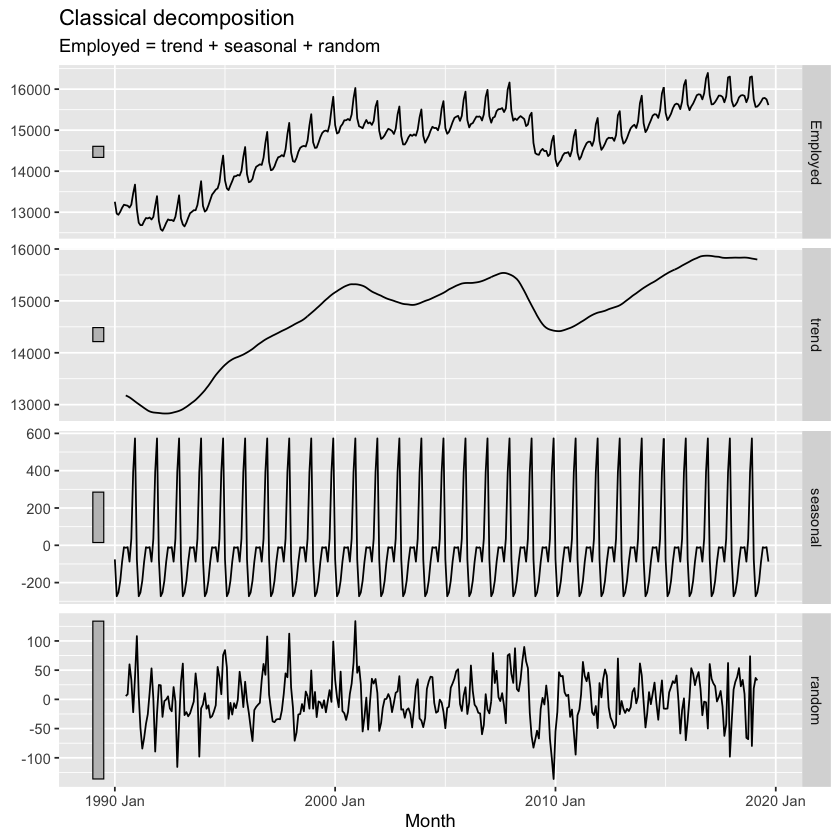

In [81]:
us_retail_employment %>%
  model(
    classical_decomposition(Employed, type = "additive")
  ) %>%
  components() %>%
  autoplot() 

In [59]:
prueba2<-us_retail_employment %>%
 model(
     stl=STL(Employed)
 ) %>%
 components()

In [61]:
prueba2[1:5,]

.model,Month,Employed,trend,season_year,remainder,season_adjust
<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stl,1990 Jan,13255.8,13290.78,-38.06049,3.08253902,13293.86
stl,1990 Feb,12966.3,13271.52,-261.00027,-44.21909739,13227.30
stl,1990 Mar,12938.2,13252.26,-291.10998,-22.95079515,13229.31
stl,1990 Apr,13012.3,13233.00,-220.79137,0.08917965,13233.09
stl,1990 May,13108.3,13212.84,-114.51926,9.97524478,13222.82


In [72]:
prueba2<-us_retail_employment %>%
 model(
     stl=STL(Employed)
 ) 


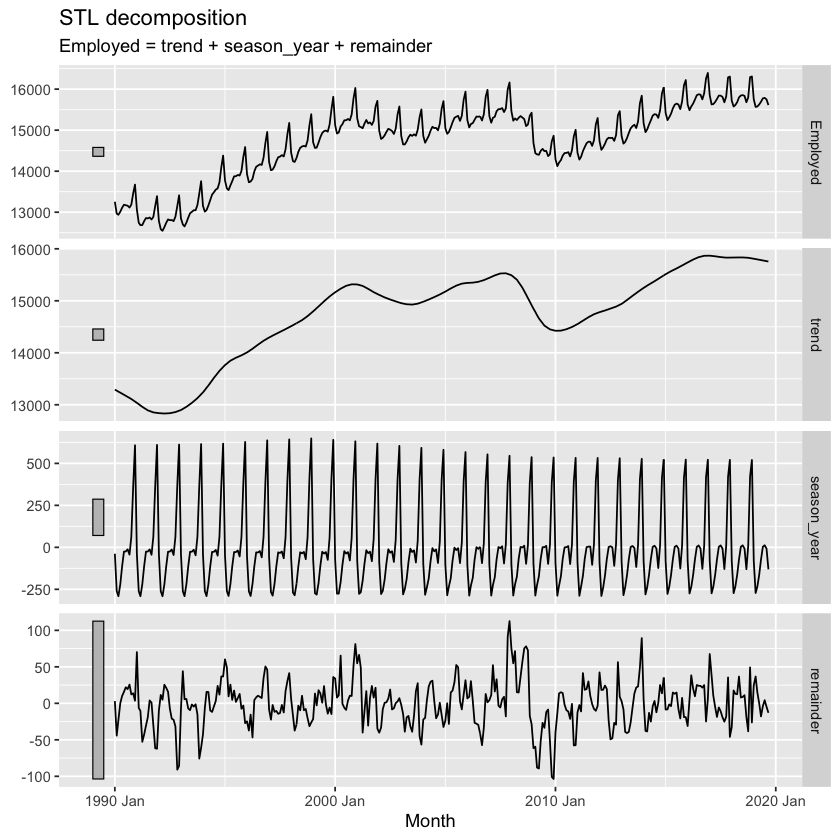

In [73]:
 components(prueba2) %>% autoplot()

In [83]:
prueba3<-us_retail_employment %>%
  model(
    classical_decomposition(Employed, type = "multiplicative")
  ) %>%
  components() 

In [84]:
prueba3[1:5,]

.model,Month,Employed,trend,seasonal,random,season_adjust
<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"classical_decomposition(Employed, type = ""multiplicative"")",1990 Jan,13255.8,NA,0.9949463,NA,13323.13
"classical_decomposition(Employed, type = ""multiplicative"")",1990 Feb,12966.3,NA,0.9814765,NA,13211.01
"classical_decomposition(Employed, type = ""multiplicative"")",1990 Mar,12938.2,NA,0.9827143,NA,13165.78
"classical_decomposition(Employed, type = ""multiplicative"")",1990 Apr,13012.3,NA,0.9869857,NA,13183.88
"classical_decomposition(Employed, type = ""multiplicative"")",1990 May,13108.3,NA,0.9938970,NA,13188.79


Warning message:
“Removed 6 row(s) containing missing values (geom_path).”


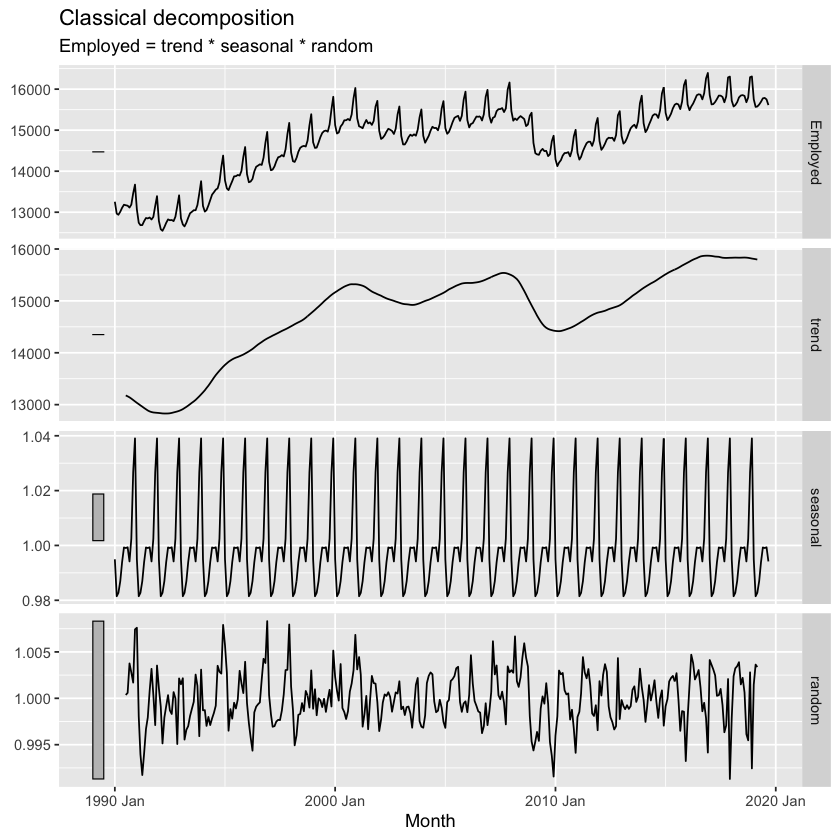

In [82]:
us_retail_employment %>%
  model(
    classical_decomposition(Employed, type = "multiplicative")
  ) %>%
  components() %>%
  autoplot() 

Warning message:
“Removed 6 row(s) containing missing values (geom_path).”


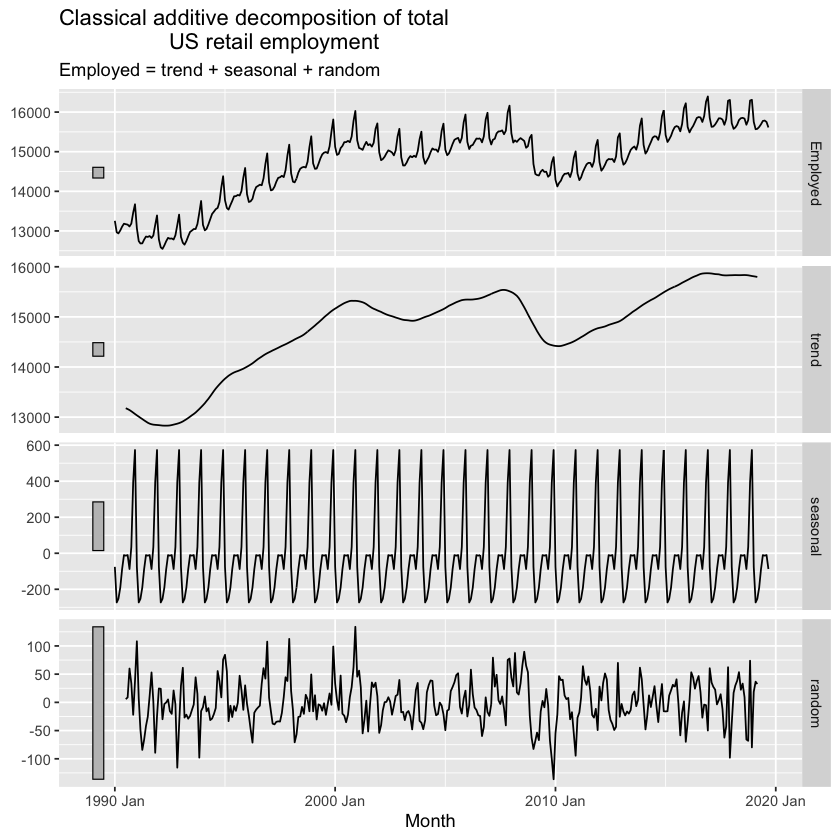

In [93]:
us_retail_employment %>%
  model(
    classical_decomposition(Employed, type = "additive")
  ) %>%
  components() %>%
  autoplot() +
  labs(title = "Classical additive decomposition of total
                  US retail employment")

# 5 Methods used by official statistics agencies

## X-13 method  (BANK OF CANADA)


In [103]:
#install.packages("seasonal")      


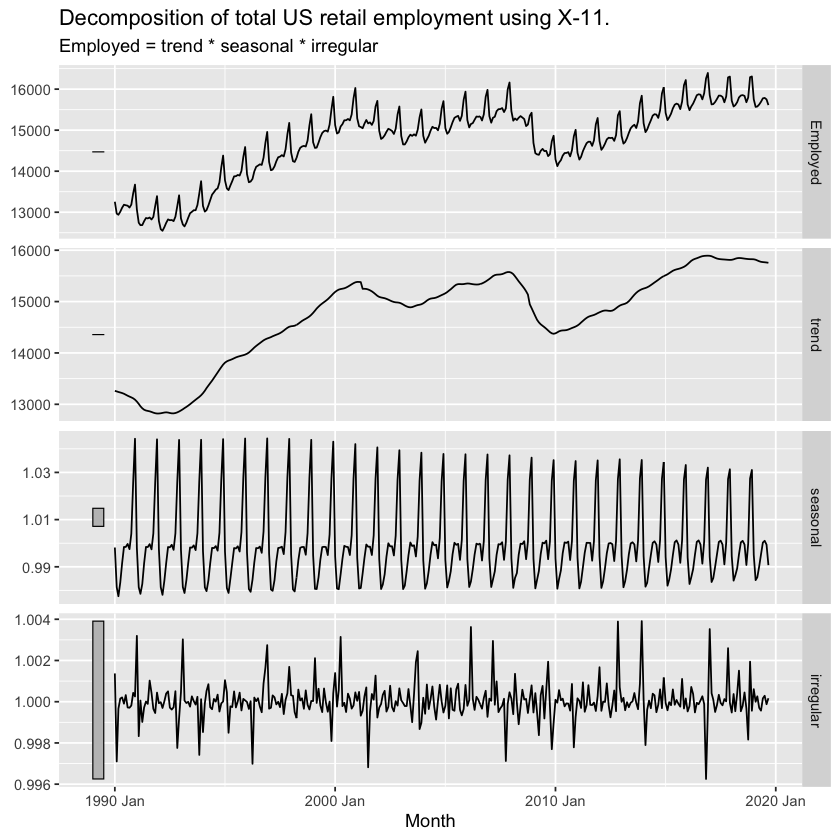

In [109]:
x_11_dcmp <- us_retail_employment %>%
 model(
 x11= X_13ARIMA_SEATS(Employed ~ x11())
 ) %>%
 components() 
autoplot(x11_dcmp) +
  labs(title =
    "Decomposition of total US retail employment using X-11.")


In [111]:
x_11_dcmp[1:5,]

.model,Month,Employed,trend,seasonal,irregular,season_adjust
<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x11,1990 Jan,13255.8,13261.85,0.9981745,1.0013720,13280.04
x11,1990 Feb,12966.3,13251.10,0.9813491,0.9971041,13212.73
x11,1990 Mar,12938.2,13240.14,0.9775266,0.9996606,13235.65
x11,1990 Apr,13012.3,13230.02,0.9833945,1.0001515,13232.02
x11,1990 May,13108.3,13219.43,0.9913870,1.0002086,13222.18


Warning message:
“Removed 357 row(s) containing missing values (geom_path).”


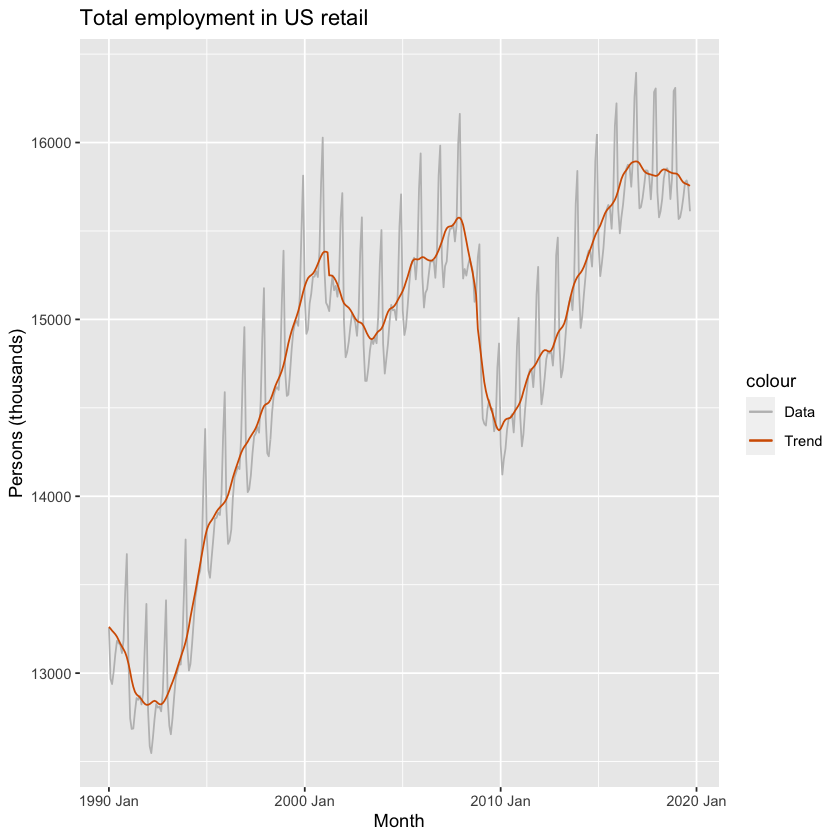

In [115]:
x_11_dcmp %>%
 ggplot(aes(x=Month))+
 geom_line(aes(y = Employed , colour="Data"))+
 geom_line(aes(y = season_adjust , colour="Seasonal Adjusted"))+
 geom_line(aes(y = trend , colour="Trend"))+
   labs(y = "Persons (thousands)",
       title = "Total employment in US retail") +
  scale_colour_manual(
    values = c("gray", "#0072B2", "#D55E00"),
    breaks = c("Data", "Seasonally Adjusted", "Trend")
      )

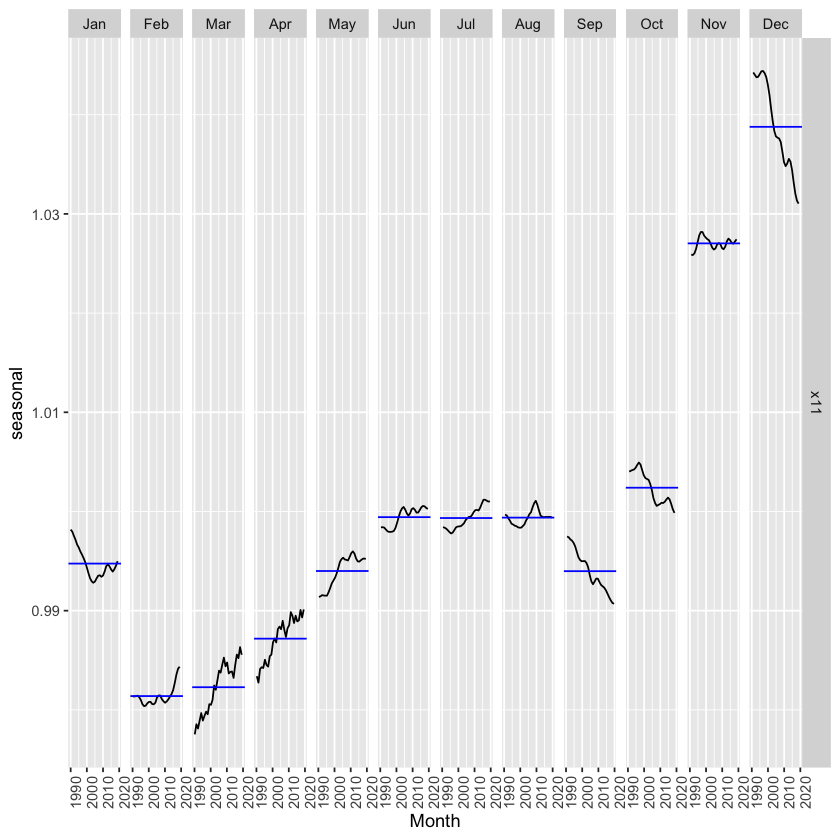

In [116]:
x11_dcmp %>%
  gg_subseries(seasonal)

## SEATS method (BANK OF SPAIN)

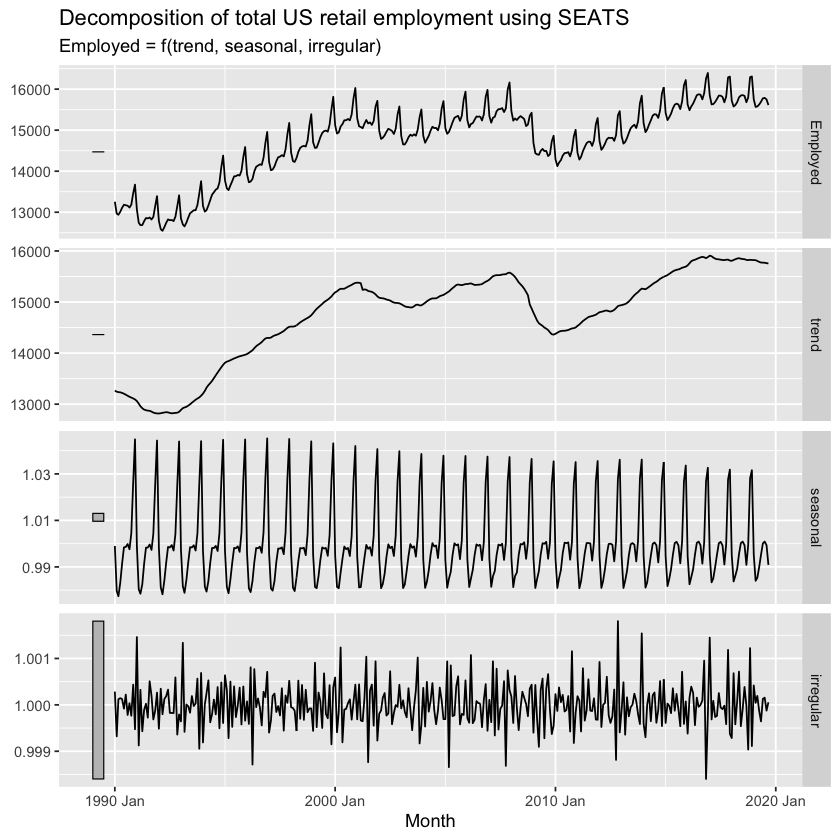

In [118]:
seats_dcmp <- us_retail_employment %>%
model(
 seats=X_13ARIMA_SEATS(Employed ~ seats())
 ) %>%
components()
autoplot(seats_dcmp) +
  labs(title =
    "Decomposition of total US retail employment using SEATS")

In [121]:
seats_dcmp[1:5,]

.model,Month,Employed,trend,seasonal,irregular,season_adjust
<chr>,<mth>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
seats,1990 Jan,13255.8,13265.19,0.9990063,1.0002859,13268.98
seats,1990 Feb,12966.3,13244.19,0.9796820,0.9993222,13235.21
seats,1990 Mar,12938.2,13235.99,0.9773822,1.0001217,13237.61
seats,1990 Apr,13012.3,13231.81,0.9832684,1.0001444,13233.72
seats,1990 May,13108.3,13220.59,0.9913832,1.0001246,13222.23


The SEATS method applied to the total retail employment series across the US. The result is quite similar to that obtained using the X-11 method

# 6 STL decomposition

STL is a versatile and robust method for decomposing time series. STL is an acronym for “Seasonal and Trend decomposition using Loess,” while loess is a method for estimating nonlinear relationships.

STL has several advantages over classical decomposition, and the SEATS and X-11 methods:

- Unlike SEATS and X-11, STL will handle any type of seasonality, not only monthly and quarterly data.
- The seasonal component is allowed to change over time, and the rate of change can be controlled by the user.
- The smoothness of the trend-cycle can also be controlled by the user.
- It can be robust to outliers (i.e., the user can specify a robust decomposition), so that occasional unusual observations will not affect the estimates of the trend-cycle and seasonal components. They will, however, affect the remainder component.

On the other hand, STL has some disadvantages: 

- In particular, it does not handle trading day or calendar variation automatically, and it only provides facilities for additive decompositions.

In [126]:
# BEFORE in the part of time series components:
#us_retail_employment %>%
# model(stl=STL(Employed))
#components(dcmp)%>%
# as_tsibble() %>%
# autoplot(Employed, colour="gray")         +
# geom_line(aes(y=trend), colour="#D55E00") +
# labs(
#      y="Persons(thousands)",
#      title= "Total Employment in US retail"
# )

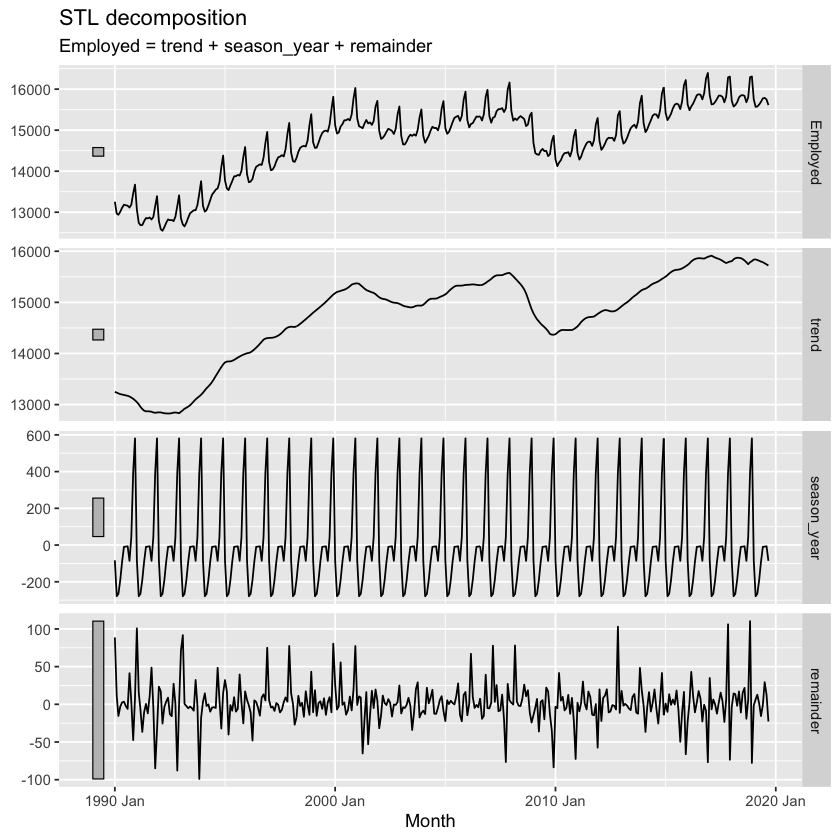

In [137]:
us_retail_employment %>%
 model(
 STL(Employed ~ trend(window=7) +
                season(window ="periodic"),
                robust=TRUE)
 ) %>%
 components() %>%
 autoplot()

Note that: 
trend(window=7) 
season(window ="periodic")
These control how rapidly the trend-cycle and seasonal components can change.
- Smaller values allow for more rapid changes.
- Both trend and seasonal windows should be odd numbers.


-trend window is the number of consecutive observations to be used when estimating the trend-cycle.

-season window is the number of consecutive years to be used in estimating each value in the seasonal component.

-Setting the seasonal window to be infinite is equivalent to forcing the seasonal component to be periodic



By default:
- seasonal window of season(window=13)
- for monthly data is trend(window=21)

usually gives a good balance between overfitting the seasonality and allowing it to slowly change over time